# 优化算法

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 目标函数

In [3]:
def func(x):
    return np.square(x)

# 目标函数导数

In [9]:
def dfunc(x):
    return 2 * x

# 梯度下降

$$ \theta_t = \theta_{t-1} - lr * grad(\theta_{t-1})$$

# 冲量

$$v_t = momentum * v_{t-1} + lr * grad(\theta_{t-1}) \\
  \theta_t = \theta_{t-1} - v_t
$$


In [13]:
def GD_momentum(x_start, df, epochs, lr, momentum):
    """
    带有冲量的梯度下降法。
    :param x_start: x的起始点
    :param df: 目标函数的一阶导函数
    :param epochs: 迭代周期
    :param lr: 学习率
    :param momentum: 冲量
    :return: x在每次迭代后的位置（包括起始点），长度为epochs+1
    """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # v表示x要改变的幅度
        v = dx * lr + momentum * v
        x -= v
        xs[i+1] = x
    return xs

In [11]:
def demo2_GD_momentum():
    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)
    plt.figure('Gradient Desent: Learning Rate, Momentum', figsize=(20, 20))

    x_start = -5
    epochs = 6

    lr = [0.01, 0.1, 0.6, 0.9]
    momentum = [0.0, 0.1, 0.5, 0.9]

    color = ['k', 'r', 'g', 'y']

    row = len(lr)
    col = len(momentum)
    size = np.ones(epochs+1) * 10
    size[-1] = 70
    for i in range(row):
        for j in range(col):
            x = GD_momentum(x_start, dfunc, epochs, lr=lr[i], momentum=momentum[j])
            plt.subplot(row, col, i * col + j + 1)
            plt.plot(line_x, line_y, c='b')
            plt.plot(x, func(x), c=color[i], label='lr={}, mo={}'.format(lr[i], momentum[j]))
            plt.scatter(x, func(x), c=color[i], s=size)
            plt.legend(loc=0)
    plt.show()

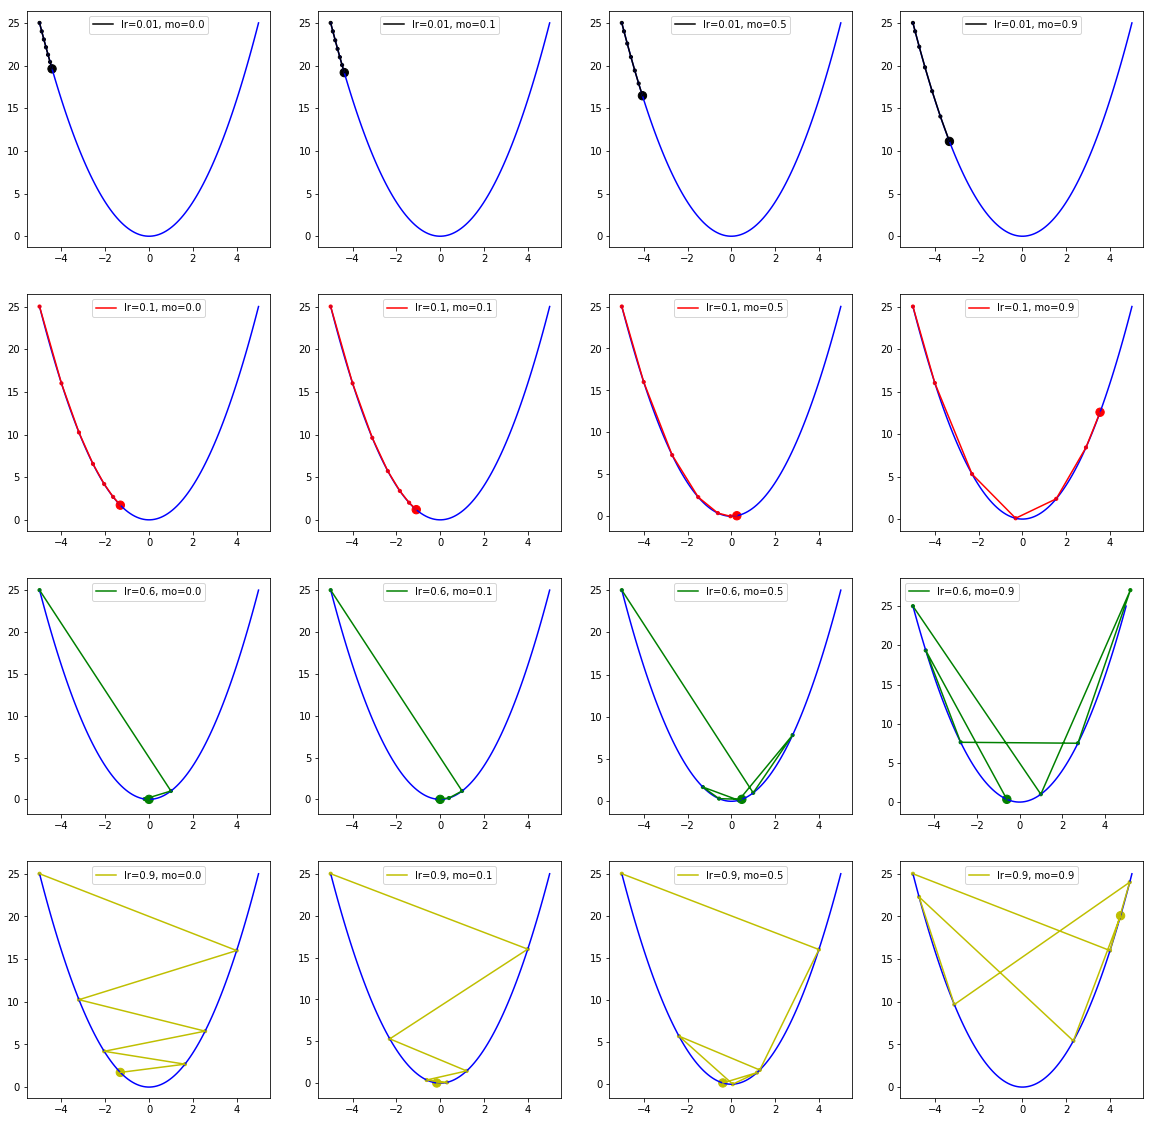

In [14]:
demo2_GD_momentum()

# NAG(nesterov accelerated gradient)

$$
v_t = \rho * v_{t-1} + lr * grad(\theta_{t-1} - \rho * v_{t-1})\\
\theta_t = \theta_{t-1} - v_t
$$

# 自适应算法
上述方法解决的是学习方向的问题，下面几种方法可以动态调整学习速率

# Adagrad(Jeff Dean)

$$
G_t = G_{t-1} + grad(\theta_{t-1})^2 \\
\theta_t = \theta_{t-1} - \frac{lr}{\sqrt{G_t + epsilon}} * grad(\theta_{t-1})
$$

# RMSprop(Hinton)

$$
G_t = \gamma * G_{t-1} + (1 - \gamma) * grad(\theta_{t-1})^2 \\
\theta_t = \theta_{t-1} - \frac{lr}{\sqrt{G_t + epsilon}} * grad(\theta_{t-1})
$$

# Adam

$$
g_t = \beta * g_t-1 + (1 - \beta) * grad(\theta_{t-1}) \\
G_t = \gamma * G_{t-1} + (1 - \gamma) * grad(\theta_{t-1})^2 \\
$$
$g_t,G_t$需要进行修正

$$
g_t = \frac{g_t}{1 - \beta^t} \\
G_t = \frac{G_t}{1 - \gamma^t} \\
\theta_t = \theta_{t-1} - \frac{lr}{\sqrt{G_t} + epsilon} * g_t
$$

# AdamMax

将学习速率衰减的2次方换成p次方，p越大，数值会越不稳定，why?

p->无穷大时，数值稳定，why?

$$ 
G_t = \beta^p * G_{t-1} + (1 - \beta^p) * grad(\theta_{t-1})^p
$$
p->无穷大时,上式等于下式
$$
G_t = max(\beta * G_{t-1}, |grad(\theta_{t-1})|） \\
\theta_t = \theta_{t-1} - \frac{lr}{G_t} * g_t
$$
#推荐值：$lr=0.002，\beta = 0.9，\gamma=0.999$

# 练习-实现其他优化算法

# 问题-目标函数不可导